This is a simplified version of the tutorial script on http://phylo.wikidot.com/biogeobears#script

# Load packages

In [1]:
library(optimx)         
library(FD)       
library(snow)     # (if you want to use multicore functionality; some systems/R versions prefer library(parallel), try either)
library(parallel)
library(BioGeoBEARS)
source("http://phylo.wdfiles.com/local--files/biogeobears/cladoRcpp.R") # (needed now that traits model added; source FIRST!)
source("http://phylo.wdfiles.com/local--files/biogeobears/BioGeoBEARS_add_fossils_randomly_v1.R")
source("http://phylo.wdfiles.com/local--files/biogeobears/BioGeoBEARS_basics_v1.R")
source("http://phylo.wdfiles.com/local--files/biogeobears/BioGeoBEARS_calc_transition_matrices_v1.R")
source("http://phylo.wdfiles.com/local--files/biogeobears/BioGeoBEARS_classes_v1.R")
source("http://phylo.wdfiles.com/local--files/biogeobears/BioGeoBEARS_detection_v1.R")
source("http://phylo.wdfiles.com/local--files/biogeobears/BioGeoBEARS_DNA_cladogenesis_sim_v1.R")
source("http://phylo.wdfiles.com/local--files/biogeobears/BioGeoBEARS_extract_Qmat_COOmat_v1.R")
source("http://phylo.wdfiles.com/local--files/biogeobears/BioGeoBEARS_generics_v1.R")
source("http://phylo.wdfiles.com/local--files/biogeobears/BioGeoBEARS_models_v1.R")
source("http://phylo.wdfiles.com/local--files/biogeobears/BioGeoBEARS_on_multiple_trees_v1.R")
source("http://phylo.wdfiles.com/local--files/biogeobears/BioGeoBEARS_plots_v1.R")
source("http://phylo.wdfiles.com/local--files/biogeobears/BioGeoBEARS_readwrite_v1.R")
source("http://phylo.wdfiles.com/local--files/biogeobears/BioGeoBEARS_simulate_v1.R")
source("http://phylo.wdfiles.com/local--files/biogeobears/BioGeoBEARS_SSEsim_makePlots_v1.R")
source("http://phylo.wdfiles.com/local--files/biogeobears/BioGeoBEARS_SSEsim_v1.R")
source("http://phylo.wdfiles.com/local--files/biogeobears/BioGeoBEARS_stochastic_mapping_v1.R")
source("http://phylo.wdfiles.com/local--files/biogeobears/BioGeoBEARS_stratified_v1.R")
source("http://phylo.wdfiles.com/local--files/biogeobears/BioGeoBEARS_univ_model_v1.R")
source("http://phylo.wdfiles.com/local--files/biogeobears/calc_uppass_probs_v1.R")
source("http://phylo.wdfiles.com/local--files/biogeobears/calc_loglike_sp_v01.R")
source("http://phylo.wdfiles.com/local--files/biogeobears/get_stratified_subbranch_top_downpass_likelihoods_v1.R")
source("http://phylo.wdfiles.com/local--files/biogeobears/runBSM_v1.R")
source("http://phylo.wdfiles.com/local--files/biogeobears/stochastic_map_given_inputs.R")
source("http://phylo.wdfiles.com/local--files/biogeobears/summarize_BSM_tables_v1.R")
source("http://phylo.wdfiles.com/local--files/biogeobears/BioGeoBEARS_traits_v1.R") # added traits model
calc_loglike_sp = compiler::cmpfun(calc_loglike_sp_prebyte)    # crucial to fix bug in uppass calculations
calc_independent_likelihoods_on_each_branch = compiler::cmpfun(calc_independent_likelihoods_on_each_branch_prebyte)
    # slight speedup hopefully

Loading required package: ade4
Loading required package: ape
Loading required package: geometry
Loading required package: magic
Loading required package: abind
Loading required package: vegan
Loading required package: permute
Loading required package: lattice
This is vegan 2.4-5

Attaching package: ‘parallel’

The following objects are masked from ‘package:snow’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, clusterSplit, makeCluster, parApply,
    parCapply, parLapply, parRapply, parSapply, splitIndices,
    stopCluster

Loading required package: rexpokit

Attaching package: ‘rexpokit’

The following object is masked from ‘package:FD’:

    maxent

Loading required package: cladoRcpp
Loading required package: phylobase

Attaching package: ‘phylobase’

The following object is masked from ‘package:ape’:

    edges

Loading required package: roxygen2


Note: no visible global function definition for 'calc_independent_likelihoods_on_each_branch' 


# Making sure working directories are set

In [2]:
getwd()
extdata_dir = np(system.file("extdata", package="BioGeoBEARS"))
extdata_dir
scriptdir = np(system.file("extdata/a_scripts", package="BioGeoBEARS"))
scriptdir

[1] "/Users/cdoorenweerd/Desktop/20180606_Saturnia_BGB"

[1] "/Library/Frameworks/R.framework/Versions/3.3/Resources/library/BioGeoBEARS/extdata"

[1] "/Library/Frameworks/R.framework/Versions/3.3/Resources/library/BioGeoBEARS/extdata/a_scripts"

# Load input tree file

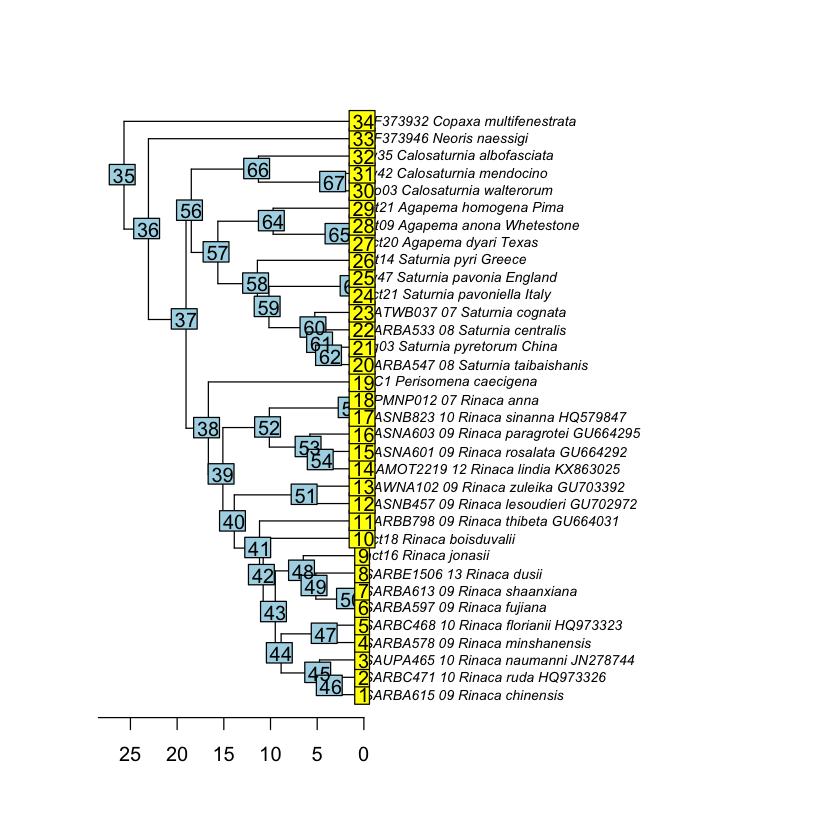

In [3]:
treefile = "20180606_Saturnia_BEAST_constrained2_ingroup.nwk"
tree = read.tree(treefile)
plot(tree, cex=0.7)
axisPhylo() # plots timescale
nodelabels()
tiplabels(1:length(tree$tip.label))

# Load geography file

In [4]:
geogrfile = "Saturnia_geography.phy"
moref(geogrfile)

34	4	(W E N S)
jbt21_Agapema_homogena_Pima	0010
jbt09_Agapema_anona_Whetestone	0010
act20_Agapema_dyari_Texas	0010
jbt14_Saturnia_pyri_Greece	1000
act21_Saturnia_pavoniella_Italy	1000
jw47_Saturnia_pavonia_England	1000
SATWB037_07_Saturnia_cognata	0100
cg03_Saturnia_pyretorum_China	0100
SARBA547_08_Saturnia_taibaishanis	0100
SARBA533_08_Saturnia_centralis	0100
jw35_Calosaturnia_albofasciata	0010
cjo03_Calosaturnia_walterorum	0010
jw42_Calosaturnia_mendocino	0010
AF373946_Neoris_naessigi	1100
PC1_Perisomena_caecigena	1000
SASNB457_09_Rinaca_lesoudieri_GU702972	0100
SAWNA102_09_Rinaca_zuleika_GU703392	0100
SASNB823_10_Rinaca_sinanna_HQ579847	0100
SPMNP012_07_Rinaca_anna	0100
MAMOT2219_12_Rinaca_lindia_KX863025	0100
SASNA603_09_Rinaca_paragrotei_GU664295	0100
SASNA601_09_Rinaca_rosalata_GU664292	0100
act18_Rinaca_boisduvalii	0100
act16_Rinaca_jonasii	0100
SARBE1506_13_Rinaca_dusii	0100
SARBA597_09_Rinaca_fujiana	0100
SARBA613_09_Rinaca_shaanxiana	0100
SARBC468_10_Rinaca_florianii_HQ973323

# Setting parameters

In [5]:
max_range_size = 2 # max number of areas a species can occupy
tipranges = getranges_from_LagrangePHYLIP(lgdata_fn=geogrfile)
tipranges

An object of class "tipranges" (from the global environment)
numeric(0)
Slot "df":
                                       W E N S
jbt21_Agapema_homogena_Pima            0 0 1 0
jbt09_Agapema_anona_Whetestone         0 0 1 0
act20_Agapema_dyari_Texas              0 0 1 0
jbt14_Saturnia_pyri_Greece             1 0 0 0
act21_Saturnia_pavoniella_Italy        1 0 0 0
jw47_Saturnia_pavonia_England          1 0 0 0
SATWB037_07_Saturnia_cognata           0 1 0 0
cg03_Saturnia_pyretorum_China          0 1 0 0
SARBA547_08_Saturnia_taibaishanis      0 1 0 0
SARBA533_08_Saturnia_centralis         0 1 0 0
jw35_Calosaturnia_albofasciata         0 0 1 0
cjo03_Calosaturnia_walterorum          0 0 1 0
jw42_Calosaturnia_mendocino            0 0 1 0
AF373946_Neoris_naessigi               1 1 0 0
PC1_Perisomena_caecigena               1 0 0 0
SASNB457_09_Rinaca_lesoudieri_GU702972 0 1 0 0
SAWNA102_09_Rinaca_zuleika_GU703392    0 1 0 0
SASNB823_10_Rinaca_sinanna_HQ579847    0 1 0 0
SPMNP012_07_Rinaca_anna                0 1 0 0
MAMOT2219_12_Rinaca_lindia_KX863025    0 1 0 0
SASNA603_09_Rinaca_paragrotei_GU664295 0 1 0 0
SASNA601_09_Rinaca_rosalata_GU664292   0 1 0 0
act18_Rinaca_boisduvalii               0 1 0 0
act16_Rinaca_jonasii                   0 1 0 0
SARBE1506_13_Rinaca_dusii              0 1 0 0
SARBA597_09_Rinaca_fujiana             0 1 0 0
SARBA613_09_Rinaca_shaanxiana          0 1 0 0
SARBC468_10_Rinaca_florianii_HQ973323  0 1 0 0
SARBA578_09_Rinaca_minshanensis        0 1 0 0
SARBB798_09_Rinaca_thibeta_GU664031    0 1 0 0
SAUPA465_10_Rinaca_naumanni_JN278744   0 1 0 0
SARBA615_09_Rinaca_chinensis           0 1 0 0
SARBC471_10_Rinaca_ruda_HQ973326       0 1 0 0
AF373932_Copaxa_multifenestrata        0 0 0 1

# Run DEC model

In [6]:
BioGeoBEARS_run_object = define_BioGeoBEARS_run() # DEC is default model
BioGeoBEARS_run_object = readfiles_BioGeoBEARS_run(BioGeoBEARS_run_object)
BioGeoBEARS_run_object$max_range_size = max_range_size
BioGeoBEARS_run_object$trfn = treefile
BioGeoBEARS_run_object$geogfn = geogrfile
BioGeoBEARS_run_object$min_branchlength = 0.000001    # Min to treat tip as a direct ancestor (no speciation event)
BioGeoBEARS_run_object$include_null_range = TRUE    # set to FALSE for e.g. DEC* model, DEC*+J, etc.
BioGeoBEARS_run_object$on_NaN_error = -1e50    # returns very low lnL if parameters produce NaN error (underflow check)
BioGeoBEARS_run_object$speedup = TRUE          # shorcuts to speed ML search; use FALSE if worried (e.g. >3 params)
BioGeoBEARS_run_object$use_optimx = TRUE    # if FALSE, use optim() instead of optimx()
BioGeoBEARS_run_object$num_cores_to_use = 4
BioGeoBEARS_run_object$force_sparse = FALSE    # force_sparse=TRUE causes pathology & isn't much faster at this scale
BioGeoBEARS_run_object$return_condlikes_table = TRUE
BioGeoBEARS_run_object$calc_TTL_loglike_from_condlikes_table = TRUE
BioGeoBEARS_run_object$calc_ancprobs = TRUE    # get ancestral states from optim run
BioGeoBEARS_run_object$BioGeoBEARS_model_object@params_table # show model parameter table
check_BioGeoBEARS_run(BioGeoBEARS_run_object) # check for errors in parameter settings

runslow = TRUE
resfn = "DEC_M0_unconstrained_v1.Rdata"
if (runslow)
    {
    res = bears_optim_run(BioGeoBEARS_run_object)
    res    

    save(res, file=resfn)
    resDEC = res
    } else {
    # Loads to "res"
    load(resfn)
    resDEC = res
    }

,type,init,min,max,est,note,desc
d,free,0.01000,1e-12,5.00000,0.01000,works,anagenesis: rate of 'dispersal' (range expansion)
e,free,0.01000,1e-12,5.00000,0.01000,works,anagenesis: rate of 'extinction' (range contraction)
a,fixed,0.00000,1e-12,5.00000,0.00000,works,anagenesis: rate of range-switching (i.e. for a standard char.)
b,fixed,1.00000,1e-12,1.00000,1.00000,non-stratified only,anagenesis: exponent on branch lengths
x,fixed,0.00000,-1e+01,10.00000,0.00000,works,"exponent on distance (modifies d, j, a)"
n,fixed,0.00000,-1e+01,10.00000,0.00000,works,"exponent on environmental distance (modifies d, j, a)"
w,fixed,1.00000,-1e+01,10.00000,1.00000,works,"exponent on manual dispersal multipliers (modifies d, j, a)"
u,fixed,0.00000,-1e+01,10.00000,0.00000,works,anagenesis: exponent on extinction risk with area (modifies e)
j,fixed,0.00000,1e-05,2.99999,0.00000,works,cladogenesis: relative per-event weight of jump dispersal
ysv,3-j,2.99999,1e-05,3.00000,2.99999,works,cladogenesis: y+s+v


[1] TRUE


Your computer has 4 cores.

Your computer has 4 cores. You have chosen to use:
num_cores_to_use = 4 cores for the matrix exponentiations in the likelihood calculations.
Started cluster with 4 cores.

[1] "parscale:"
[1] 1 1


NOTE: Before running optimx(), here is a test calculation of the data likelihood
using calc_loglike_for_optim() on initial parameter values...
if this crashes, the error messages are more helpful
than those from inside optimx().

     d    e a b x n w u j ysv ys y s v mx01 mx01j mx01y mx01s mx01v mx01r  mf
1 0.01 0.01 0 1 0 0 1 0 0   3  2 1 1 1    0     0     0     0     0   0.5 0.1
  dp fdp     LnL
1  1   0 -31.557

calc_loglike_for_optim() on initial parameters loglike=-31.55736



Calculation of likelihood on initial parameters: successful.

Now starting Maximum Likelihood (ML) parameter optimization with optimx()...



Printing any warnings() that occurred during calc_loglike_for_optim():

NULL


Results of optimx:::scalecheck() below. Note: sometimes rescali

Warning message in (function (npt = min(n + 2L, 2L * n), rhobeg = NA, rhoend = NA, :
“unused control arguments ignored”

     d    e a b x n w u j ysv ys y s v mx01 mx01j mx01y mx01s mx01v mx01r  mf
1 0.01 0.01 0 1 0 0 1 0 0   3  2 1 1 1    0     0     0     0     0   0.5 0.1
  dp fdp     LnL
1  1   0 -31.557
     d    e a b x n w u j ysv ys y s v mx01 mx01j mx01y mx01s mx01v mx01r  mf
1 0.01 0.01 0 1 0 0 1 0 0   3  2 1 1 1    0     0     0     0     0   0.5 0.1
  dp fdp     LnL
1  1   0 -31.557
      d    e a b x n w u j ysv ys y s v mx01 mx01j mx01y mx01s mx01v mx01r  mf
1 0.012 0.01 0 1 0 0 1 0 0   3  2 1 1 1    0     0     0     0     0   0.5 0.1
  dp fdp     LnL
1  1   0 -32.371
     d     e a b x n w u j ysv ys y s v mx01 mx01j mx01y mx01s mx01v mx01r  mf
1 0.01 0.012 0 1 0 0 1 0 0   3  2 1 1 1    0     0     0     0     0   0.5 0.1
  dp fdp     LnL
1  1   0 -31.855
      d    e a b x n w u j ysv ys y s v mx01 mx01j mx01y mx01s mx01v mx01r  mf
1 0.008 0.01 0 1 0 0 1 0 0   3  2 1 1 1    0     0     0     0     0   0.5 0.1
  dp fdp     LnL
1  1   0 -30.903
      d     e a b x n w u j ysv ys y s v mx0

# Plot DEC results

        LnL nparams           d     e j
1 -29.05885       2 0.004422698 1e-12 0


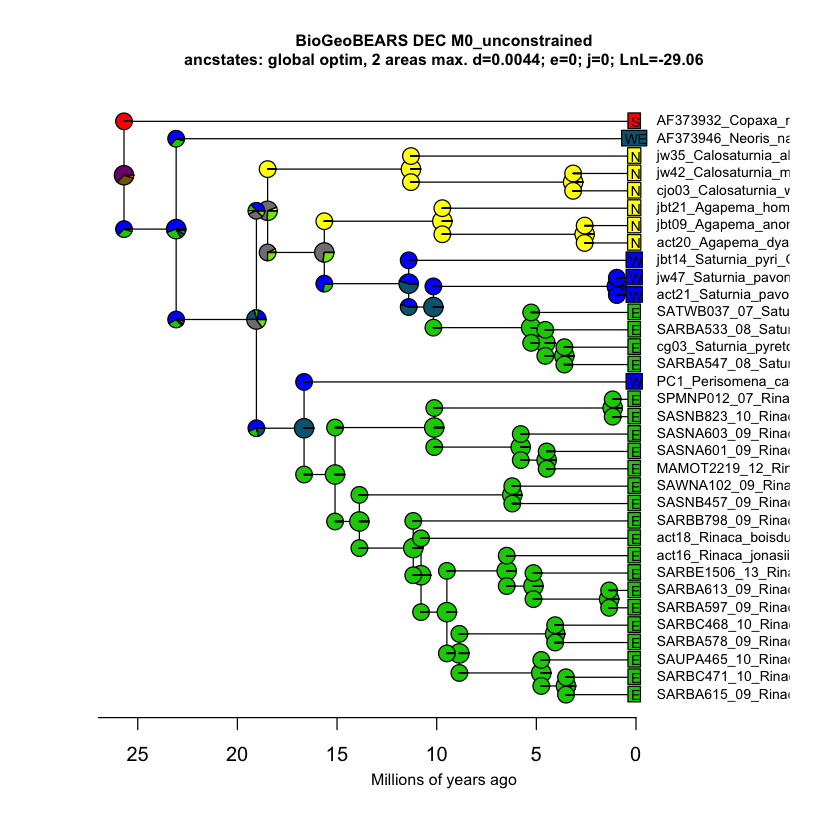

In [7]:
#png("test1.png")
results_object = resDEC
analysis_titletxt ="BioGeoBEARS DEC M0_unconstrained"
print(plot_BioGeoBEARS_results(results_object, analysis_titletxt, addl_params=list("j"), 
                         plotwhat="pie", label.offset=0.45, tipcex=0.7, statecex=0.7, 
                         splitcex=0.6, titlecex=0.8, plotsplits=TRUE, 
                         cornercoords_loc=scriptdir, include_null_range=TRUE, 
                         tr=tree, tipranges=tipranges))
#dev.off()

# Run DEC+J model (jump dispersal)

In [8]:
BioGeoBEARS_run_object = define_BioGeoBEARS_run()
BioGeoBEARS_run_object = readfiles_BioGeoBEARS_run(BioGeoBEARS_run_object)
BioGeoBEARS_run_object$trfn = treefile
BioGeoBEARS_run_object$geogfn = geogrfile
BioGeoBEARS_run_object$max_range_size = max_range_size
BioGeoBEARS_run_object$min_branchlength = 0.000001    # Min to treat tip as a direct ancestor (no speciation event)
BioGeoBEARS_run_object$include_null_range = TRUE    # set to FALSE for e.g. DEC* model, DEC*+J, etc.
BioGeoBEARS_run_object$on_NaN_error = -1e50    # returns very low lnL if parameters produce NaN error (underflow check)
BioGeoBEARS_run_object$speedup = TRUE          # shorcuts to speed ML search; use FALSE if worried (e.g. >3 params)
BioGeoBEARS_run_object$use_optimx = TRUE    # if FALSE, use optim() instead of optimx()
BioGeoBEARS_run_object$num_cores_to_use = 4
BioGeoBEARS_run_object$force_sparse = FALSE    # force_sparse=TRUE causes pathology & isn't much faster at this scale
BioGeoBEARS_run_object$return_condlikes_table = TRUE
BioGeoBEARS_run_object$calc_TTL_loglike_from_condlikes_table = TRUE
BioGeoBEARS_run_object$calc_ancprobs = TRUE    # get ancestral states from optim run
dstart = resDEC$outputs@params_table["d","est"]
estart = resDEC$outputs@params_table["e","est"]
jstart = 0.0001
BioGeoBEARS_run_object$BioGeoBEARS_model_object@params_table["d","init"] = dstart
BioGeoBEARS_run_object$BioGeoBEARS_model_object@params_table["d","est"] = dstart
BioGeoBEARS_run_object$BioGeoBEARS_model_object@params_table["e","init"] = estart
BioGeoBEARS_run_object$BioGeoBEARS_model_object@params_table["e","est"] = estart
BioGeoBEARS_run_object$BioGeoBEARS_model_object@params_table["j","type"] = "free"
BioGeoBEARS_run_object$BioGeoBEARS_model_object@params_table["j","init"] = jstart
BioGeoBEARS_run_object$BioGeoBEARS_model_object@params_table["j","est"] = jstart
check_BioGeoBEARS_run(BioGeoBEARS_run_object)

resfn = "DEC+J_M0_unconstrained_v1.Rdata"
runslow = TRUE
if (runslow)
    {
    #sourceall("/Dropbox/_njm/__packages/BioGeoBEARS_setup/")

    res = bears_optim_run(BioGeoBEARS_run_object)
    res    

    save(res, file=resfn)

    resDECj = res
    } else {
    # Loads to "res"
    load(resfn)
    resDECj = res
    }

[1] TRUE


Your computer has 4 cores.

Your computer has 4 cores. You have chosen to use:
num_cores_to_use = 4 cores for the matrix exponentiations in the likelihood calculations.
Started cluster with 4 cores.

[1] "parscale:"
[1] 1.666678 1.666678 1.000000


NOTE: Before running optimx(), here is a test calculation of the data likelihood
using calc_loglike_for_optim() on initial parameter values...
if this crashes, the error messages are more helpful
than those from inside optimx().

      d e a b x n w u j ysv ys y s v mx01 mx01j mx01y mx01s mx01v mx01r  mf dp
1 0.004 0 0 1 0 0 1 0 0   3  2 1 1 1    0     0     0     0     0   0.5 0.1  1
  fdp     LnL
1   0 -28.973

calc_loglike_for_optim() on initial parameters loglike=-28.9732



Calculation of likelihood on initial parameters: successful.

Now starting Maximum Likelihood (ML) parameter optimization with optimx()...



Printing any warnings() that occurred during calc_loglike_for_optim():

NULL


Results of optimx:::scalecheck() below. Note:

Warning message in optimx.check(par, optcfg$ufn, optcfg$ugr, optcfg$uhess, lower, :
“Parameters or bounds appear to have different scalings.
  This can cause poor performance in optimization. 
  It is important for derivative free methods like BOBYQA, UOBYQA, NEWUOA.”Warning message in (function (npt = min(n + 2L, 2L * n), rhobeg = NA, rhoend = NA, :
“unused control arguments ignored”

      d e a b x n w u j ysv ys y s v mx01 mx01j mx01y mx01s mx01v mx01r  mf dp
1 0.004 0 0 1 0 0 1 0 0   3  2 1 1 1    0     0     0     0     0   0.5 0.1  1
  fdp     LnL
1   0 -28.973
      d e a b x n w u     j   ysv    ys y s v mx01 mx01j mx01y mx01s mx01v
1 0.004 0 0 1 0 0 1 0 0.001 2.999 1.999 1 1 1    0     0     0     0     0
  mx01r  mf dp fdp     LnL
1   0.5 0.1  1   0 -28.407
      d e a b x n w u     j   ysv    ys y s v mx01 mx01j mx01y mx01s mx01v
1 0.005 0 0 1 0 0 1 0 0.001 2.999 1.999 1 1 1    0     0     0     0     0
  mx01r  mf dp fdp     LnL
1   0.5 0.1  1   0 -28.585
      d     e a b x n w u     j   ysv    ys y s v mx01 mx01j mx01y mx01s mx01v
1 0.004 0.001 0 1 0 0 1 0 0.001 2.999 1.999 1 1 1    0     0     0     0     0
  mx01r  mf dp fdp     LnL
1   0.5 0.1  1   0 -28.516
      d e a b x n w u     j   ysv    ys     y     s     v mx01 mx01j mx01y
1 0.004 0 0 1 0 0 1 0 0.002 2.998 1.999 0.999 0.999 0.999    0     0     0
  mx01s mx01v mx01r  mf dp fdp     LnL
1    

LnL,nparams,d,e,j
-23.88776,3,0.001061749,1e-12,0.02593786


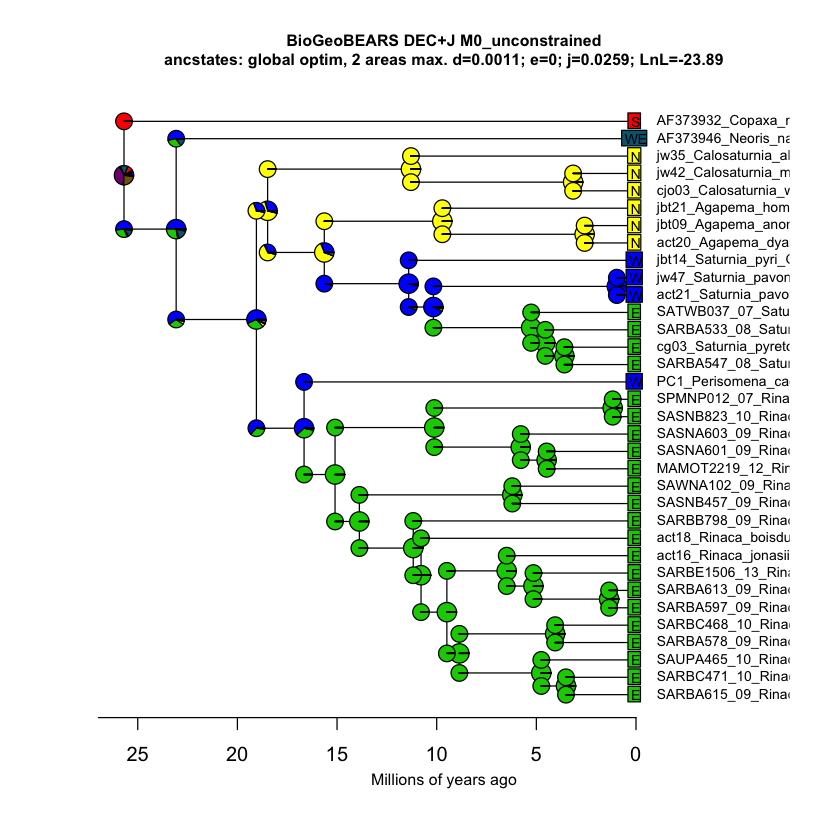

In [9]:
#pdf("BGB_DECJ.pdf", width=6, height=6, useDingbats=FALSE)
results_object = resDECj
analysis_titletxt ="BioGeoBEARS DEC+J M0_unconstrained"
plot_BioGeoBEARS_results(results_object, analysis_titletxt, addl_params=list("j"), 
                           plotwhat="pie", label.offset=0.45, tipcex=0.7, statecex=0.7, 
                           splitcex=0.6, titlecex=0.8, plotsplits=TRUE, 
                           cornercoords_loc=scriptdir, include_null_range=TRUE, 
                           tr=tree, tipranges=tipranges)
#dev.off() # closes the pdf

### Table with marginal prob for each state and node

In [10]:
# see http://phylo.wikidot.com/example-biogeobears-scripts#working
# You can see that in this table, nrows = number of nodes
# (tips+internal), and ncols = number of states (= number 
# of possible ranges).
#
# The rows are in the order of APE's default node numbering
# scheme:
#
# Node number (and then interpretation)
# 1-ntips = tip node numbers
# ntips+1 = root node number
# (ntips+1):(ntips+num_internal_nodes) = internal node numbers

round(resDEC$ML_marginal_prob_each_state_at_branch_top_AT_node, 2)
#write.csv(Nodeprobs, file = "DECJ_Nodeprobs.csv")

# this one displays the results for each corner:
#resDEC$ML_marginal_prob_each_state_at_branch_bottom_below_node

0,0,1,0,0,0,0,0,0,0,0
0,0,1,0,0,0,0,0,0,0,0
0,0,1,0,0,0,0,0,0,0,0
0,0,1,0,0,0,0,0,0,0,0
0,0,1,0,0,0,0,0,0,0,0
0,0,1,0,0,0,0,0,0,0,0
0,0,1,0,0,0,0,0,0,0,0
0,0,1,0,0,0,0,0,0,0,0
0,0,1,0,0,0,0,0,0,0,0
0,0,1,0,0,0,0,0,0,0,0
0,0,1,0,0,0,0,0,0,0,0


# Run DIVALIKE model

In [11]:
BioGeoBEARS_run_object = define_BioGeoBEARS_run()
BioGeoBEARS_run_object$trfn = treefile
BioGeoBEARS_run_object$geogfn = geogrfile
BioGeoBEARS_run_object$max_range_size = max_range_size
BioGeoBEARS_run_object$min_branchlength = 0.000001    # Min to treat tip as a direct ancestor (no speciation event)
BioGeoBEARS_run_object$include_null_range = TRUE    # set to FALSE for e.g. DEC* model, DEC*+J, etc.
BioGeoBEARS_run_object$on_NaN_error = -1e50    # returns very low lnL if parameters produce NaN error (underflow check)
BioGeoBEARS_run_object$speedup = TRUE          # shorcuts to speed ML search; use FALSE if worried (e.g. >3 params)
BioGeoBEARS_run_object$use_optimx = TRUE    # if FALSE, use optim() instead of optimx()
BioGeoBEARS_run_object$num_cores_to_use = 4
BioGeoBEARS_run_object$force_sparse = FALSE    # force_sparse=TRUE causes pathology & isn't much faster at this scale
BioGeoBEARS_run_object = readfiles_BioGeoBEARS_run(BioGeoBEARS_run_object)
BioGeoBEARS_run_object$return_condlikes_table = TRUE
BioGeoBEARS_run_object$calc_TTL_loglike_from_condlikes_table = TRUE
BioGeoBEARS_run_object$calc_ancprobs = TRUE    # get ancestral states from optim run
BioGeoBEARS_run_object$BioGeoBEARS_model_object@params_table["s","type"] = "fixed"
BioGeoBEARS_run_object$BioGeoBEARS_model_object@params_table["s","init"] = 0.0
BioGeoBEARS_run_object$BioGeoBEARS_model_object@params_table["s","est"] = 0.0
BioGeoBEARS_run_object$BioGeoBEARS_model_object@params_table["ysv","type"] = "2-j"
BioGeoBEARS_run_object$BioGeoBEARS_model_object@params_table["ys","type"] = "ysv*1/2"
BioGeoBEARS_run_object$BioGeoBEARS_model_object@params_table["y","type"] = "ysv*1/2"
BioGeoBEARS_run_object$BioGeoBEARS_model_object@params_table["v","type"] = "ysv*1/2"
BioGeoBEARS_run_object$BioGeoBEARS_model_object@params_table["mx01v","type"] = "fixed"
BioGeoBEARS_run_object$BioGeoBEARS_model_object@params_table["mx01v","init"] = 0.5
BioGeoBEARS_run_object$BioGeoBEARS_model_object@params_table["mx01v","est"] = 0.5

runslow = TRUE
resfn = "Psychotria_DIVALIKE_M0_unconstrained_v1.Rdata"
if (runslow)
    {
    res = bears_optim_run(BioGeoBEARS_run_object)
    res    

    save(res, file=resfn)
    resDIVALIKE = res
    } else {
    # Loads to "res"
    load(resfn)
    resDIVALIKE = res
    }


Your computer has 4 cores.

Your computer has 4 cores. You have chosen to use:
num_cores_to_use = 4 cores for the matrix exponentiations in the likelihood calculations.
Started cluster with 4 cores.

[1] "parscale:"
[1] 1 1


NOTE: Before running optimx(), here is a test calculation of the data likelihood
using calc_loglike_for_optim() on initial parameter values...
if this crashes, the error messages are more helpful
than those from inside optimx().

     d    e a b x n w u j ysv ys y s v mx01 mx01j mx01y mx01s mx01v mx01r  mf
1 0.01 0.01 0 1 0 0 1 0 0   2  1 1 0 1    0     0     0     0   0.5   0.5 0.1
  dp fdp     LnL
1  1   0 -30.314

calc_loglike_for_optim() on initial parameters loglike=-30.31428



Calculation of likelihood on initial parameters: successful.

Now starting Maximum Likelihood (ML) parameter optimization with optimx()...



Printing any warnings() that occurred during calc_loglike_for_optim():

NULL


Results of optimx:::scalecheck() below. Note: sometimes rescali

Warning message in (function (npt = min(n + 2L, 2L * n), rhobeg = NA, rhoend = NA, :
“unused control arguments ignored”

     d    e a b x n w u j ysv ys y s v mx01 mx01j mx01y mx01s mx01v mx01r  mf
1 0.01 0.01 0 1 0 0 1 0 0   2  1 1 0 1    0     0     0     0   0.5   0.5 0.1
  dp fdp     LnL
1  1   0 -30.314
     d    e a b x n w u j ysv ys y s v mx01 mx01j mx01y mx01s mx01v mx01r  mf
1 0.01 0.01 0 1 0 0 1 0 0   2  1 1 0 1    0     0     0     0   0.5   0.5 0.1
  dp fdp     LnL
1  1   0 -30.314
      d    e a b x n w u j ysv ys y s v mx01 mx01j mx01y mx01s mx01v mx01r  mf
1 0.012 0.01 0 1 0 0 1 0 0   2  1 1 0 1    0     0     0     0   0.5   0.5 0.1
  dp fdp     LnL
1  1   0 -31.075
     d     e a b x n w u j ysv ys y s v mx01 mx01j mx01y mx01s mx01v mx01r  mf
1 0.01 0.012 0 1 0 0 1 0 0   2  1 1 0 1    0     0     0     0   0.5   0.5 0.1
  dp fdp     LnL
1  1   0 -30.765
      d    e a b x n w u j ysv ys y s v mx01 mx01j mx01y mx01s mx01v mx01r  mf
1 0.008 0.01 0 1 0 0 1 0 0   2  1 1 0 1    0     0     0     0   0.5   0.5 0.1
  dp fdp     LnL
1  1   0 -29.748
      d     e a b x n w u j ysv ys y s v mx0

# Plot DIVALIKE results

LnL,nparams,d,e,j
-27.14091,2,0.005415993,1e-12,0


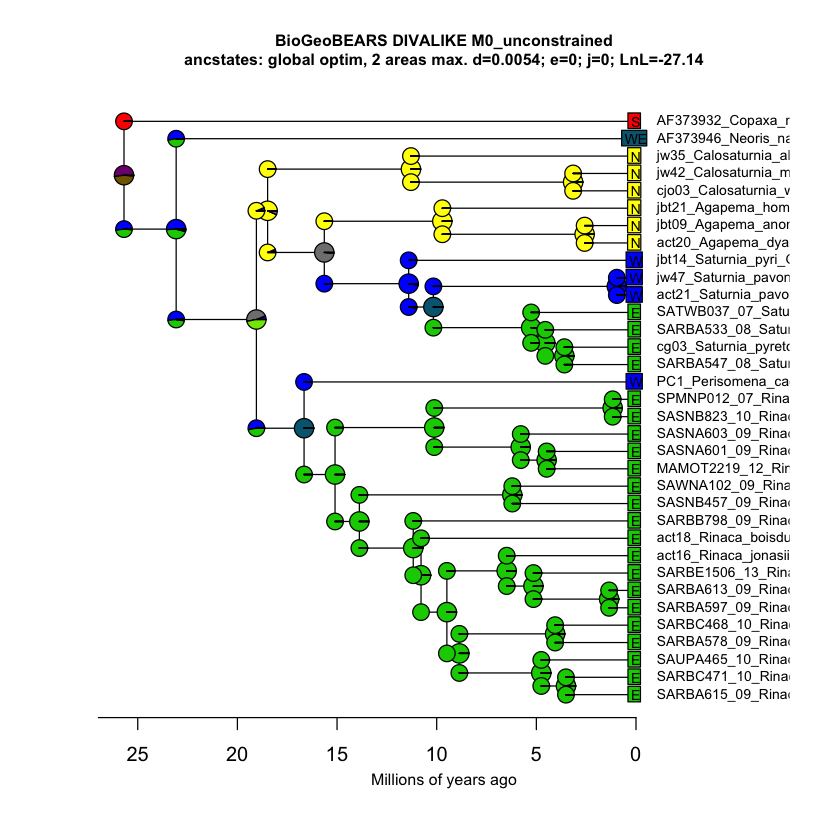

In [12]:
results_object = resDIVALIKE
analysis_titletxt ="BioGeoBEARS DIVALIKE M0_unconstrained"
plot_BioGeoBEARS_results(results_object, analysis_titletxt, addl_params=list("j"), 
                           plotwhat="pie", label.offset=0.45, tipcex=0.7, statecex=0.7, 
                           splitcex=0.6, titlecex=0.8, plotsplits=TRUE, 
                           cornercoords_loc=scriptdir, include_null_range=TRUE, 
                           tr=tree, tipranges=tipranges)

# Run DIVALIKE+J model

In [13]:
BioGeoBEARS_run_object = define_BioGeoBEARS_run()
BioGeoBEARS_run_object$trfn = treefile
BioGeoBEARS_run_object$geogfn = geogrfile
BioGeoBEARS_run_object$max_range_size = max_range_size
BioGeoBEARS_run_object$min_branchlength = 0.000001    # Min to treat tip as a direct ancestor (no speciation event)
BioGeoBEARS_run_object$include_null_range = TRUE    # set to FALSE for e.g. DEC* model, DEC*+J, etc.
BioGeoBEARS_run_object$on_NaN_error = -1e50    # returns very low lnL if parameters produce NaN error (underflow check)
BioGeoBEARS_run_object$speedup = TRUE          # shorcuts to speed ML search; use FALSE if worried (e.g. >3 params)
BioGeoBEARS_run_object$use_optimx = TRUE    # if FALSE, use optim() instead of optimx()
BioGeoBEARS_run_object$num_cores_to_use = 4
BioGeoBEARS_run_object$force_sparse = FALSE    # force_sparse=TRUE causes pathology & isn't much faster at this scale
BioGeoBEARS_run_object = readfiles_BioGeoBEARS_run(BioGeoBEARS_run_object)
BioGeoBEARS_run_object$return_condlikes_table = TRUE
BioGeoBEARS_run_object$calc_TTL_loglike_from_condlikes_table = TRUE
BioGeoBEARS_run_object$calc_ancprobs = TRUE    # get ancestral states from optim run
dstart = resDIVALIKE$outputs@params_table["d","est"]
estart = resDIVALIKE$outputs@params_table["e","est"]
jstart = 0.0001
BioGeoBEARS_run_object$BioGeoBEARS_model_object@params_table["d","init"] = dstart
BioGeoBEARS_run_object$BioGeoBEARS_model_object@params_table["d","est"] = dstart
BioGeoBEARS_run_object$BioGeoBEARS_model_object@params_table["e","init"] = estart
BioGeoBEARS_run_object$BioGeoBEARS_model_object@params_table["e","est"] = estart
BioGeoBEARS_run_object$BioGeoBEARS_model_object@params_table["s","type"] = "fixed"
BioGeoBEARS_run_object$BioGeoBEARS_model_object@params_table["s","init"] = 0.0
BioGeoBEARS_run_object$BioGeoBEARS_model_object@params_table["s","est"] = 0.0
BioGeoBEARS_run_object$BioGeoBEARS_model_object@params_table["ysv","type"] = "2-j"
BioGeoBEARS_run_object$BioGeoBEARS_model_object@params_table["ys","type"] = "ysv*1/2"
BioGeoBEARS_run_object$BioGeoBEARS_model_object@params_table["y","type"] = "ysv*1/2"
BioGeoBEARS_run_object$BioGeoBEARS_model_object@params_table["v","type"] = "ysv*1/2"
BioGeoBEARS_run_object$BioGeoBEARS_model_object@params_table["mx01v","type"] = "fixed"
BioGeoBEARS_run_object$BioGeoBEARS_model_object@params_table["mx01v","init"] = 0.5
BioGeoBEARS_run_object$BioGeoBEARS_model_object@params_table["mx01v","est"] = 0.5
BioGeoBEARS_run_object$BioGeoBEARS_model_object@params_table["j","type"] = "free"
BioGeoBEARS_run_object$BioGeoBEARS_model_object@params_table["j","init"] = jstart
BioGeoBEARS_run_object$BioGeoBEARS_model_object@params_table["j","est"] = jstart
BioGeoBEARS_run_object$BioGeoBEARS_model_object@params_table["j","min"] = 0.00001
BioGeoBEARS_run_object$BioGeoBEARS_model_object@params_table["j","max"] = 1.99999

check_BioGeoBEARS_run(BioGeoBEARS_run_object)

resfn = "DIVALIKE+J_M0_unconstrained_v1.Rdata"
runslow = TRUE
if (runslow)
    {
    #sourceall("/Dropbox/_njm/__packages/BioGeoBEARS_setup/")

    res = bears_optim_run(BioGeoBEARS_run_object)
    res    

    save(res, file=resfn)

    resDIVALIKEj = res
    } else {
    # Loads to "res"
    load(resfn)
    resDIVALIKEj = res
    }

[1] TRUE


Your computer has 4 cores.

Your computer has 4 cores. You have chosen to use:
num_cores_to_use = 4 cores for the matrix exponentiations in the likelihood calculations.
Started cluster with 4 cores.

[1] "parscale:"
[1] 2.500025 2.500025 1.000000


NOTE: Before running optimx(), here is a test calculation of the data likelihood
using calc_loglike_for_optim() on initial parameter values...
if this crashes, the error messages are more helpful
than those from inside optimx().

      d e a b x n w u j ysv ys y s v mx01 mx01j mx01y mx01s mx01v mx01r  mf dp
1 0.005 0 0 1 0 0 1 0 0   2  1 1 0 1    0     0     0     0   0.5   0.5 0.1  1
  fdp     LnL
1   0 -27.081

calc_loglike_for_optim() on initial parameters loglike=-27.08118



Calculation of likelihood on initial parameters: successful.

Now starting Maximum Likelihood (ML) parameter optimization with optimx()...



Printing any warnings() that occurred during calc_loglike_for_optim():

NULL


Results of optimx:::scalecheck() below. Note

Warning message in optimx.check(par, optcfg$ufn, optcfg$ugr, optcfg$uhess, lower, :
“Parameters or bounds appear to have different scalings.
  This can cause poor performance in optimization. 
  It is important for derivative free methods like BOBYQA, UOBYQA, NEWUOA.”Warning message in (function (npt = min(n + 2L, 2L * n), rhobeg = NA, rhoend = NA, :
“unused control arguments ignored”

      d e a b x n w u j ysv ys y s v mx01 mx01j mx01y mx01s mx01v mx01r  mf dp
1 0.005 0 0 1 0 0 1 0 0   2  1 1 0 1    0     0     0     0   0.5   0.5 0.1  1
  fdp     LnL
1   0 -27.081
      d e a b x n w u     j   ysv    ys     y s     v mx01 mx01j mx01y mx01s
1 0.005 0 0 1 0 0 1 0 0.001 1.999 0.999 0.999 0 0.999    0     0     0     0
  mx01v mx01r  mf dp fdp     LnL
1   0.5   0.5 0.1  1   0 -26.574
      d e a b x n w u     j   ysv    ys     y s     v mx01 mx01j mx01y mx01s
1 0.006 0 0 1 0 0 1 0 0.001 1.999 0.999 0.999 0 0.999    0     0     0     0
  mx01v mx01r  mf dp fdp     LnL
1   0.5   0.5 0.1  1   0 -26.777
      d     e a b x n w u     j   ysv    ys     y s     v mx01 mx01j mx01y
1 0.005 0.001 0 1 0 0 1 0 0.001 1.999 0.999 0.999 0 0.999    0     0     0
  mx01s mx01v mx01r  mf dp fdp    LnL
1     0   0.5   0.5 0.1  1   0 -26.83
      d e a b x n w u     j   ysv    ys     y s     v mx01 mx01j mx01y mx01s
1 0.005 0 0 1 0 0 1 0 0.002 1.998 0.999 0.999 0 0.999    0     0     0 

# Plot DIVALIKE+J results

LnL,nparams,d,e,j
-22.9824,3,0.001395563,1e-12,0.02318939


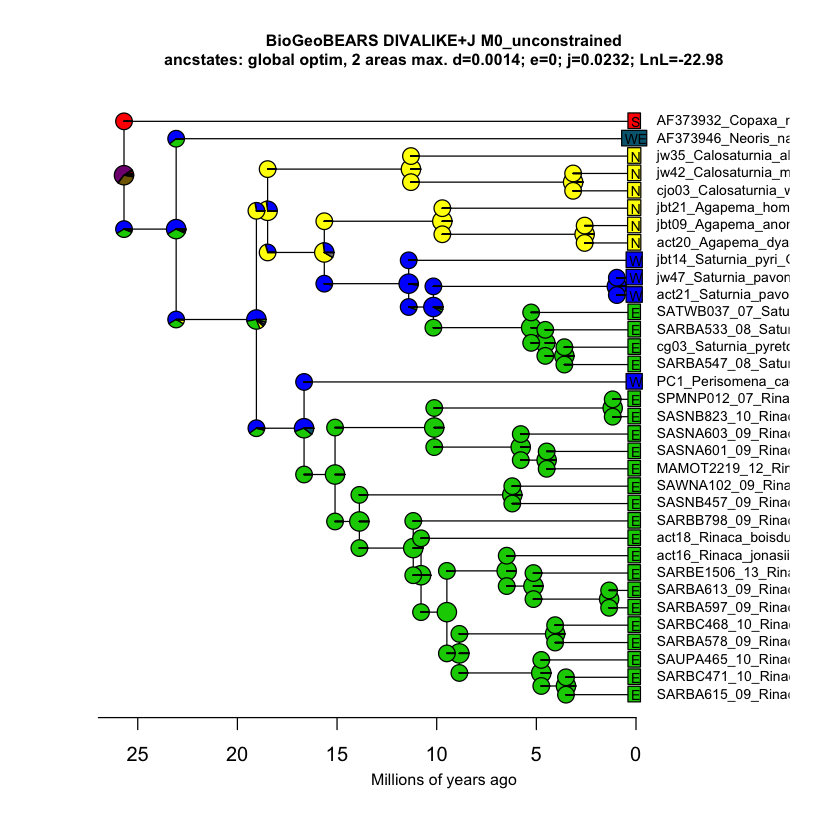

In [14]:
results_object = resDIVALIKEj
analysis_titletxt ="BioGeoBEARS DIVALIKE+J M0_unconstrained"
plot_BioGeoBEARS_results(results_object, analysis_titletxt, addl_params=list("j"), 
                           plotwhat="pie", label.offset=0.45, tipcex=0.7, statecex=0.7, 
                           splitcex=0.6, titlecex=0.8, plotsplits=TRUE, 
                           cornercoords_loc=scriptdir, include_null_range=TRUE, 
                           tr=tree, tipranges=tipranges)

In [15]:
# see http://phylo.wikidot.com/example-biogeobears-scripts#working
# You can see that in this table, nrows = number of nodes
# (tips+internal), and ncols = number of states (= number 
# of possible ranges).
#
# The rows are in the order of APE's default node numbering
# scheme:
#
# Node number (and then interpretation)
# 1-ntips = tip node numbers
# ntips+1 = root node number
# (ntips+1):(ntips+num_internal_nodes) = internal node numbers

Nodeprobs <- round(resDIVALIKEj$ML_marginal_prob_each_state_at_branch_top_AT_node, 2)
write.csv(Nodeprobs, file = "DIVAJ_Nodeprobs.csv")

# this one displays the results for each corner:
#resDEC$ML_marginal_prob_each_state_at_branch_bottom_below_node

# Run BAYAREALIKE model

In [16]:
BioGeoBEARS_run_object = define_BioGeoBEARS_run()
BioGeoBEARS_run_object$trfn = treefile
BioGeoBEARS_run_object$geogfn = geogrfile
BioGeoBEARS_run_object$max_range_size = max_range_size
BioGeoBEARS_run_object$min_branchlength = 0.000001    # Min to treat tip as a direct ancestor (no speciation event)
BioGeoBEARS_run_object$include_null_range = TRUE    # set to FALSE for e.g. DEC* model, DEC*+J, etc.
BioGeoBEARS_run_object$on_NaN_error = -1e50    # returns very low lnL if parameters produce NaN error (underflow check)
BioGeoBEARS_run_object$speedup = TRUE          # shorcuts to speed ML search; use FALSE if worried (e.g. >3 params)
BioGeoBEARS_run_object$use_optimx = TRUE    # if FALSE, use optim() instead of optimx()
BioGeoBEARS_run_object$num_cores_to_use = 4
BioGeoBEARS_run_object$force_sparse = FALSE    # force_sparse=TRUE causes pathology & isn't much faster at this scale
BioGeoBEARS_run_object = readfiles_BioGeoBEARS_run(BioGeoBEARS_run_object)
BioGeoBEARS_run_object$return_condlikes_table = TRUE
BioGeoBEARS_run_object$calc_TTL_loglike_from_condlikes_table = TRUE
BioGeoBEARS_run_object$calc_ancprobs = TRUE    # get ancestral states from optim run
BioGeoBEARS_run_object$BioGeoBEARS_model_object@params_table["s","type"] = "fixed"
BioGeoBEARS_run_object$BioGeoBEARS_model_object@params_table["s","init"] = 0.0
BioGeoBEARS_run_object$BioGeoBEARS_model_object@params_table["s","est"] = 0.0
BioGeoBEARS_run_object$BioGeoBEARS_model_object@params_table["v","type"] = "fixed"
BioGeoBEARS_run_object$BioGeoBEARS_model_object@params_table["v","init"] = 0.0
BioGeoBEARS_run_object$BioGeoBEARS_model_object@params_table["v","est"] = 0.0
BioGeoBEARS_run_object$BioGeoBEARS_model_object@params_table["ysv","type"] = "1-j"
BioGeoBEARS_run_object$BioGeoBEARS_model_object@params_table["ys","type"] = "ysv*1/1"
BioGeoBEARS_run_object$BioGeoBEARS_model_object@params_table["y","type"] = "1-j"
BioGeoBEARS_run_object$BioGeoBEARS_model_object@params_table["mx01y","type"] = "fixed"
BioGeoBEARS_run_object$BioGeoBEARS_model_object@params_table["mx01y","init"] = 0.9999
BioGeoBEARS_run_object$BioGeoBEARS_model_object@params_table["mx01y","est"] = 0.9999

check_BioGeoBEARS_run(BioGeoBEARS_run_object)

runslow = TRUE
resfn = "BAYAREALIKE_M0_unconstrained_v1.Rdata"
if (runslow)
    {
    res = bears_optim_run(BioGeoBEARS_run_object)
    res    

    save(res, file=resfn)
    resBAYAREALIKE = res
    } else {
    # Loads to "res"
    load(resfn)
    resBAYAREALIKE = res
    }

[1] TRUE


Your computer has 4 cores.

Your computer has 4 cores. You have chosen to use:
num_cores_to_use = 4 cores for the matrix exponentiations in the likelihood calculations.
Started cluster with 4 cores.

[1] "parscale:"
[1] 1 1


NOTE: Before running optimx(), here is a test calculation of the data likelihood
using calc_loglike_for_optim() on initial parameter values...
if this crashes, the error messages are more helpful
than those from inside optimx().

     d    e a b x n w u j ysv ys y s v mx01 mx01j mx01y mx01s mx01v mx01r  mf
1 0.01 0.01 0 1 0 0 1 0 0   1  1 1 0 0    0     0     1     0     0   0.5 0.1
  dp fdp     LnL
1  1   0 -41.837

calc_loglike_for_optim() on initial parameters loglike=-41.83669



Calculation of likelihood on initial parameters: successful.

Now starting Maximum Likelihood (ML) parameter optimization with optimx()...



Printing any warnings() that occurred during calc_loglike_for_optim():

NULL


Results of optimx:::scalecheck() below. Note: sometimes rescali

Warning message in (function (npt = min(n + 2L, 2L * n), rhobeg = NA, rhoend = NA, :
“unused control arguments ignored”

     d    e a b x n w u j ysv ys y s v mx01 mx01j mx01y mx01s mx01v mx01r  mf
1 0.01 0.01 0 1 0 0 1 0 0   1  1 1 0 0    0     0     1     0     0   0.5 0.1
  dp fdp     LnL
1  1   0 -41.837
     d    e a b x n w u j ysv ys y s v mx01 mx01j mx01y mx01s mx01v mx01r  mf
1 0.01 0.01 0 1 0 0 1 0 0   1  1 1 0 0    0     0     1     0     0   0.5 0.1
  dp fdp     LnL
1  1   0 -41.837
      d    e a b x n w u j ysv ys y s v mx01 mx01j mx01y mx01s mx01v mx01r  mf
1 0.012 0.01 0 1 0 0 1 0 0   1  1 1 0 0    0     0     1     0     0   0.5 0.1
  dp fdp     LnL
1  1   0 -42.348
     d     e a b x n w u j ysv ys y s v mx01 mx01j mx01y mx01s mx01v mx01r  mf
1 0.01 0.012 0 1 0 0 1 0 0   1  1 1 0 0    0     0     1     0     0   0.5 0.1
  dp fdp     LnL
1  1   0 -41.169
      d    e a b x n w u j ysv ys y s v mx01 mx01j mx01y mx01s mx01v mx01r  mf
1 0.008 0.01 0 1 0 0 1 0 0   1  1 1 0 0    0     0     1     0     0   0.5 0.1
  dp fdp     LnL
1  1   0 -41.542
      d     e a b x n w u j ysv ys y s v mx0

LnL,nparams,d,e,j
-39.31573,2,0.006890059,0.0256672,0


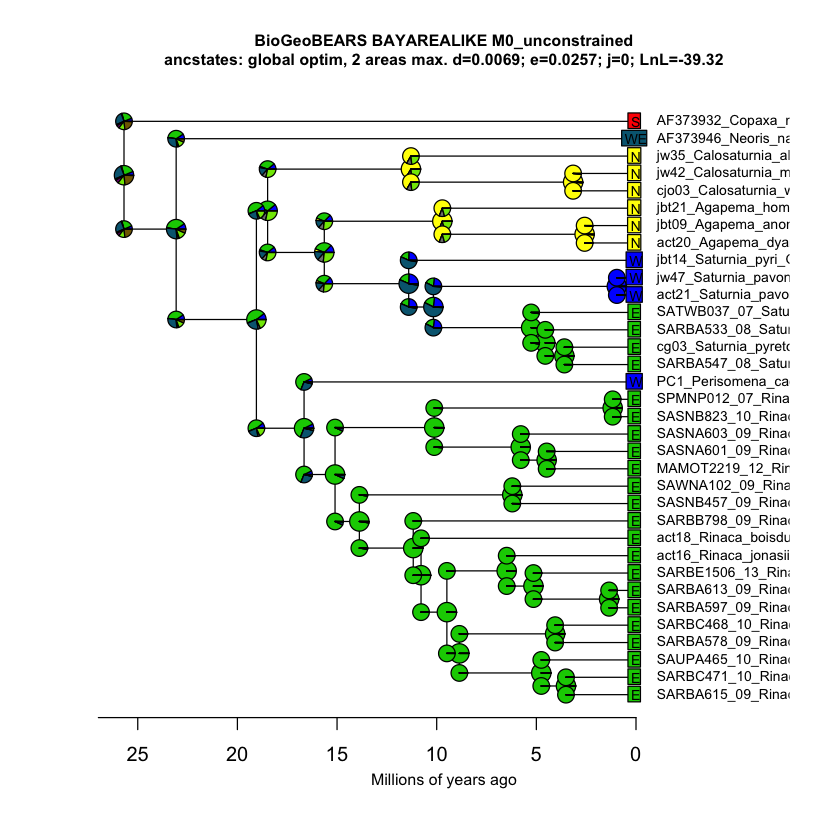

In [17]:
results_object = resBAYAREALIKE
analysis_titletxt ="BioGeoBEARS BAYAREALIKE M0_unconstrained"
plot_BioGeoBEARS_results(results_object, analysis_titletxt, addl_params=list("j"), 
                           plotwhat="pie", label.offset=0.45, tipcex=0.7, statecex=0.7, 
                           splitcex=0.6, titlecex=0.8, plotsplits=TRUE, 
                           cornercoords_loc=scriptdir, include_null_range=TRUE, 
                           tr=tree)

# Run BAYAREALIKE+J model

In [18]:
BioGeoBEARS_run_object = define_BioGeoBEARS_run()
BioGeoBEARS_run_object$trfn = treefile
BioGeoBEARS_run_object$geogfn = geogrfile
BioGeoBEARS_run_object$max_range_size = max_range_size
BioGeoBEARS_run_object$min_branchlength = 0.000001    # Min to treat tip as a direct ancestor (no speciation event)
BioGeoBEARS_run_object$include_null_range = TRUE    # set to FALSE for e.g. DEC* model, DEC*+J, etc.
BioGeoBEARS_run_object$on_NaN_error = -1e50    # returns very low lnL if parameters produce NaN error (underflow check)
BioGeoBEARS_run_object$speedup = TRUE          # shorcuts to speed ML search; use FALSE if worried (e.g. >3 params)
BioGeoBEARS_run_object$use_optimx = TRUE
BioGeoBEARS_run_object$num_cores_to_use = 4
BioGeoBEARS_run_object$force_sparse = FALSE    # force_sparse=TRUE causes pathology & isn't much faster at this scale
BioGeoBEARS_run_object$return_condlikes_table = TRUE
BioGeoBEARS_run_object$calc_TTL_loglike_from_condlikes_table = TRUE
BioGeoBEARS_run_object$calc_ancprobs = TRUE    # get ancestral states from optim run
dstart = resBAYAREALIKE$outputs@params_table["d","est"]
estart = resBAYAREALIKE$outputs@params_table["e","est"]
jstart = 0.0001
BioGeoBEARS_run_object$BioGeoBEARS_model_object@params_table["d","init"] = dstart
BioGeoBEARS_run_object$BioGeoBEARS_model_object@params_table["d","est"] = dstart
BioGeoBEARS_run_object$BioGeoBEARS_model_object@params_table["e","init"] = estart
BioGeoBEARS_run_object$BioGeoBEARS_model_object@params_table["e","est"] = estart
BioGeoBEARS_run_object$BioGeoBEARS_model_object@params_table["s","type"] = "fixed"
BioGeoBEARS_run_object$BioGeoBEARS_model_object@params_table["s","init"] = 0.0
BioGeoBEARS_run_object$BioGeoBEARS_model_object@params_table["s","est"] = 0.0
BioGeoBEARS_run_object$BioGeoBEARS_model_object@params_table["v","type"] = "fixed"
BioGeoBEARS_run_object$BioGeoBEARS_model_object@params_table["v","init"] = 0.0
BioGeoBEARS_run_object$BioGeoBEARS_model_object@params_table["v","est"] = 0.0
BioGeoBEARS_run_object$BioGeoBEARS_model_object@params_table["j","type"] = "free"
BioGeoBEARS_run_object$BioGeoBEARS_model_object@params_table["j","init"] = jstart
BioGeoBEARS_run_object$BioGeoBEARS_model_object@params_table["j","est"] = jstart
BioGeoBEARS_run_object$BioGeoBEARS_model_object@params_table["j","max"] = 0.99999
BioGeoBEARS_run_object$BioGeoBEARS_model_object@params_table["ysv","type"] = "1-j"
BioGeoBEARS_run_object$BioGeoBEARS_model_object@params_table["ys","type"] = "ysv*1/1"
BioGeoBEARS_run_object$BioGeoBEARS_model_object@params_table["y","type"] = "1-j"
BioGeoBEARS_run_object$BioGeoBEARS_model_object@params_table["mx01y","type"] = "fixed"
BioGeoBEARS_run_object$BioGeoBEARS_model_object@params_table["mx01y","init"] = 0.9999
BioGeoBEARS_run_object$BioGeoBEARS_model_object@params_table["mx01y","est"] = 0.9999
BioGeoBEARS_run_object$BioGeoBEARS_model_object@params_table["d","min"] = 0.0000001
BioGeoBEARS_run_object$BioGeoBEARS_model_object@params_table["d","max"] = 4.9999999
BioGeoBEARS_run_object$BioGeoBEARS_model_object@params_table["e","min"] = 0.0000001
BioGeoBEARS_run_object$BioGeoBEARS_model_object@params_table["e","max"] = 4.9999999
BioGeoBEARS_run_object$BioGeoBEARS_model_object@params_table["j","min"] = 0.00001
BioGeoBEARS_run_object$BioGeoBEARS_model_object@params_table["j","max"] = 0.99999

check_BioGeoBEARS_run(BioGeoBEARS_run_object)

resfn = "Psychotria_BAYAREALIKE+J_M0_unconstrained_v1.Rdata"
runslow = TRUE
if (runslow)
    {
    res = bears_optim_run(BioGeoBEARS_run_object)
    res    

    save(res, file=resfn)

    resBAYAREALIKEj = res
    } else {
    # Loads to "res"
    load(resfn)
    resBAYAREALIKEj = res
    }

[1] TRUE


Your computer has 4 cores.

Your computer has 4 cores. You have chosen to use:
num_cores_to_use = 4 cores for the matrix exponentiations in the likelihood calculations.
Started cluster with 4 cores.

[1] "parscale:"
[1] 5.0001 5.0001 1.0000


NOTE: Before running optimx(), here is a test calculation of the data likelihood
using calc_loglike_for_optim() on initial parameter values...
if this crashes, the error messages are more helpful
than those from inside optimx().

      d     e a b x n w u j ysv ys y s v mx01 mx01j mx01y mx01s mx01v mx01r  mf
1 0.007 0.026 0 1 0 0 1 0 0   1  1 1 0 0    0     0     1     0     0   0.5 0.1
  dp fdp     LnL
1  1   0 -39.135

calc_loglike_for_optim() on initial parameters loglike=-39.13529



Calculation of likelihood on initial parameters: successful.

Now starting Maximum Likelihood (ML) parameter optimization with optimx()...



Printing any warnings() that occurred during calc_loglike_for_optim():

NULL


Results of optimx:::scalecheck() below. No

Warning message in (function (npt = min(n + 2L, 2L * n), rhobeg = NA, rhoend = NA, :
“unused control arguments ignored”

      d     e a b x n w u j ysv ys y s v mx01 mx01j mx01y mx01s mx01v mx01r  mf
1 0.007 0.026 0 1 0 0 1 0 0   1  1 1 0 0    0     0     1     0     0   0.5 0.1
  dp fdp     LnL
1  1   0 -39.135
      d     e a b x n w u     j   ysv    ys     y s v mx01 mx01j mx01y mx01s
1 0.007 0.026 0 1 0 0 1 0 0.005 0.995 0.995 0.995 0 0    0     0     1     0
  mx01v mx01r  mf dp fdp     LnL
1     0   0.5 0.1  1   0 -35.841
      d     e a b x n w u     j   ysv    ys     y s v mx01 mx01j mx01y mx01s
1 0.012 0.026 0 1 0 0 1 0 0.005 0.995 0.995 0.995 0 0    0     0     1     0
  mx01v mx01r  mf dp fdp     LnL
1     0   0.5 0.1  1   0 -38.053
      d     e a b x n w u     j   ysv    ys     y s v mx01 mx01j mx01y mx01s
1 0.007 0.031 0 1 0 0 1 0 0.005 0.995 0.995 0.995 0 0    0     0     1     0
  mx01v mx01r  mf dp fdp     LnL
1     0   0.5 0.1  1   0 -36.615
      d     e a b x n w u    j  ysv   ys    y s v mx01 mx01j mx01y mx01s mx01v
1 0.007 0.026 0 1 0 0 1 0 0.01 0.99 0.99 0.99 0 0    0     0     1 

# Plot BAYAREALIKE+J results

LnL,nparams,d,e,j
-25.24241,3,0.0005808792,1e-07,0.03350564


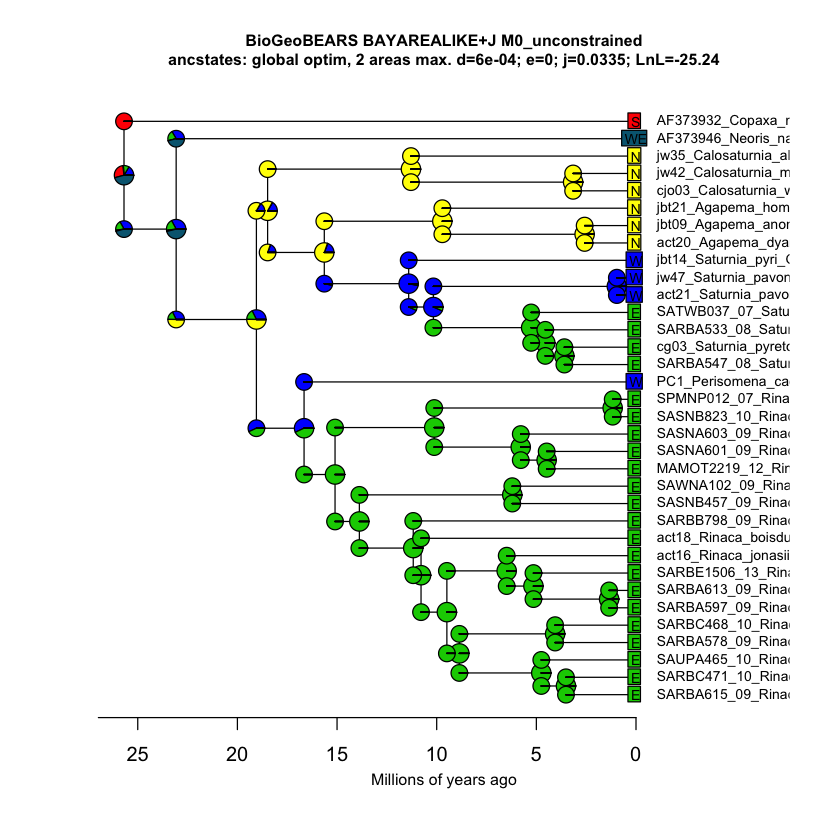

In [19]:
results_object = resBAYAREALIKEj
analysis_titletxt ="BioGeoBEARS BAYAREALIKE+J M0_unconstrained"
plot_BioGeoBEARS_results(results_object, analysis_titletxt, addl_params=list("j"), 
                           plotwhat="pie", label.offset=0.45, tipcex=0.7, statecex=0.7, 
                           splitcex=0.6, titlecex=0.8, plotsplits=TRUE, 
                           cornercoords_loc=scriptdir, include_null_range=TRUE, 
                           tr=tree)

# Test for best model fit

In [20]:
# set up empty tables to hold the results
restable = NULL
teststable = NULL

# DEC vs DEC+J
# extract log likelihood from DEC and DEC+J model results
LnL_2 = get_LnL_from_BioGeoBEARS_results_object(resDEC)
LnL_1 = get_LnL_from_BioGeoBEARS_results_object(resDECj)
numparams1 = 3
numparams2 = 2
stats = AICstats_2models(LnL_1, LnL_2, numparams1, numparams2)
# DEC, null model for Likelihood Ratio Test (LRT)
res2 = extract_params_from_BioGeoBEARS_results_object(results_object=resDEC, 
                                                      returnwhat="table", 
                                                      addl_params=c("j"), 
                                                      paramsstr_digits=4)
# DEC+J, alternative model for Likelihood Ratio Test (LRT)
res1 = extract_params_from_BioGeoBEARS_results_object(results_object=resDECj, 
                                                      returnwhat="table", 
                                                      addl_params=c("j"), 
                                                      paramsstr_digits=4)
rbind(res2, res1)
tmp_tests = conditional_format_table(stats)
restable = rbind(restable, res2, res1)
teststable = rbind(teststable, tmp_tests)

# DIVALIKE vs DIVALIKE+J
LnL_2 = get_LnL_from_BioGeoBEARS_results_object(resDIVALIKE)
LnL_1 = get_LnL_from_BioGeoBEARS_results_object(resDIVALIKEj)
numparams1 = 3
numparams2 = 2
stats = AICstats_2models(LnL_1, LnL_2, numparams1, numparams2)
# DIVALIKE, null model for Likelihood Ratio Test (LRT)
res2 = extract_params_from_BioGeoBEARS_results_object(results_object=resDIVALIKE, 
                                                      returnwhat="table", 
                                                      addl_params=c("j"), 
                                                      paramsstr_digits=4)
# DIVALIKE+J, alternative model for Likelihood Ratio Test (LRT)
res1 = extract_params_from_BioGeoBEARS_results_object(results_object=resDIVALIKEj, 
                                                      returnwhat="table", 
                                                      addl_params=c("j"), 
                                                      paramsstr_digits=4)
rbind(res2, res1)
conditional_format_table(stats)
tmp_tests = conditional_format_table(stats)
restable = rbind(restable, res2, res1)
teststable = rbind(teststable, tmp_tests)

# BAYAREALIKE vs BAYAREALIKE+J
LnL_2 = get_LnL_from_BioGeoBEARS_results_object(resBAYAREALIKE)
LnL_1 = get_LnL_from_BioGeoBEARS_results_object(resBAYAREALIKEj)
numparams1 = 3
numparams2 = 2
stats = AICstats_2models(LnL_1, LnL_2, numparams1, numparams2)
# BAYAREALIKE, null model for Likelihood Ratio Test (LRT)
res2 = extract_params_from_BioGeoBEARS_results_object(results_object=resBAYAREALIKE, 
                                                      returnwhat="table", 
                                                      addl_params=c("j"), 
                                                      paramsstr_digits=4)
# BAYAREALIKE+J, alternative model for Likelihood Ratio Test (LRT)
res1 = extract_params_from_BioGeoBEARS_results_object(results_object=resBAYAREALIKEj, 
                                                      returnwhat="table", 
                                                      addl_params=c("j"), 
                                                      paramsstr_digits=4)
rbind(res2, res1)
conditional_format_table(stats)
tmp_tests = conditional_format_table(stats)
restable = rbind(restable, res2, res1)
teststable = rbind(teststable, tmp_tests)





# All results combined

teststable$alt = c("DEC+J", "DIVALIKE+J", "BAYAREALIKE+J")
teststable$null = c("DEC", "DIVALIKE", "BAYAREALIKE")
row.names(restable) = c("DEC", "DEC+J", "DIVALIKE", "DIVALIKE+J", "BAYAREALIKE", "BAYAREALIKE+J")
restable = put_jcol_after_ecol(restable)

restable
teststable

LnL,numparams,d,e,j
-29.05885,2,0.004422698,1e-12,0.00000000
-23.88776,3,0.001061749,1e-12,0.02593786


LnL,numparams,d,e,j
-27.14091,2,0.005415993,1e-12,0.00000000
-22.98240,3,0.001395563,1e-12,0.02318939


alt,null,LnLalt,LnLnull,DFalt,DFnull,DF,Dstatistic,pval,test,tail,AIC1,AIC2,AICwt1,AICwt2,AICweight_ratio_model1,AICweight_ratio_model2
,,-22.98,-27.14,3,2,1,8.32,0.0039,chi-squared,one-tailed,51.96,58.28,0.96,0.041,23.54,0.042


LnL,numparams,d,e,j
-39.31573,2,0.0068900594,0.0256672,0.00000000
-25.24241,3,0.0005808792,0.0000001,0.03350564


alt,null,LnLalt,LnLnull,DFalt,DFnull,DF,Dstatistic,pval,test,tail,AIC1,AIC2,AICwt1,AICwt2,AICweight_ratio_model1,AICweight_ratio_model2
,,-25.24,-39.32,3,2,1,28.15,1.1e-07,chi-squared,one-tailed,56.48,82.63,1.00,2.1e-06,476072,2.1e-06


,LnL,numparams,d,e,j
DEC,-29.05885,2,0.0044226977,1.00000e-12,0.00000000
DEC+J,-23.88776,3,0.0010617485,1.00000e-12,0.02593786
DIVALIKE,-27.14091,2,0.0054159928,1.00000e-12,0.00000000
DIVALIKE+J,-22.98240,3,0.0013955625,1.00000e-12,0.02318939
BAYAREALIKE,-39.31573,2,0.0068900594,2.56672e-02,0.00000000
BAYAREALIKE+J,-25.24241,3,0.0005808792,1.00000e-07,0.03350564


,alt,null,LnLalt,LnLnull,DFalt,DFnull,DF,Dstatistic,pval,test,tail,AIC1,AIC2,AICwt1,AICwt2,AICweight_ratio_model1,AICweight_ratio_model2
1,DEC+J,DEC,-23.89,-29.06,3,2,1,10.34,0.0013,chi-squared,one-tailed,53.78,62.12,0.98,0.015,64.79,0.015
11,DIVALIKE+J,DIVALIKE,-22.98,-27.14,3,2,1,8.32,0.0039,chi-squared,one-tailed,51.96,58.28,0.96,0.041,23.54,0.042
12,BAYAREALIKE+J,BAYAREALIKE,-25.24,-39.32,3,2,1,28.15,1.1e-07,chi-squared,one-tailed,56.48,82.63,1.00,2.1e-06,476072,2.1e-06


The DEC+J model is the best fit for our dataset?